Como avaliar o seu modelo? Neste notebook vamos estudar algumas métricas para avaliar modelos de regressão.

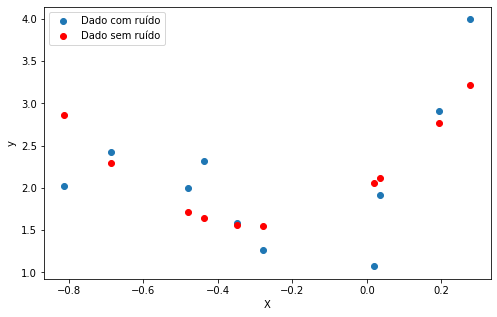

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
N=10 #Número de amostras
# Cria um problema de regressão
mu, sigma = 0, 0.5 # mean and standard deviation
X = np.random.normal(mu, sigma, N)
noise = np.random.normal(mu,0.8 , N)

a=5
b=3
c=2
y = a*X**2 + b*X + c
ynoise = y+noise

plt.subplots(figsize=(8, 5))

plt.scatter(X, ynoise, marker='o',label='Dado com ruído')
plt.plot(X, y,'or',label='Dado sem ruído')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [126]:
y.shape

(10,)

In [127]:
# Vamos montar a matriz de coeficientes X_b
X_b = np.array([np.ones(X.shape), X, X**2]).T
print("Número de amostras:",X_b.shape[0])
print("Número de atributos:",X_b.shape[1])



Número de amostras: 10
Número de atributos: 3


In [128]:
# Calcula equação normal
coef = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# melhor ajuste para theta
#y_fit = coef[0] + coef[1]*X + coef[2]*X**2
y_fit = X_b.dot(coef.T)

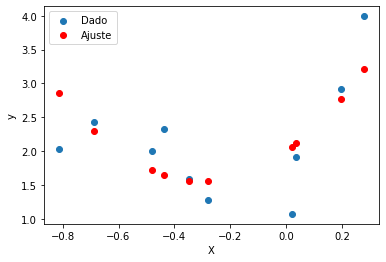

In [129]:
plt.scatter(X, ynoise, marker='o',label='Dado')
plt.plot(X, y_fit,'or',label='Ajuste')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [130]:
# Vamos melhorar este plot do ajuste
Xnew = np.linspace(np.min(X),np.max(X),N)
X_b_new = np.array([np.ones(Xnew.shape), Xnew, Xnew**2]).T

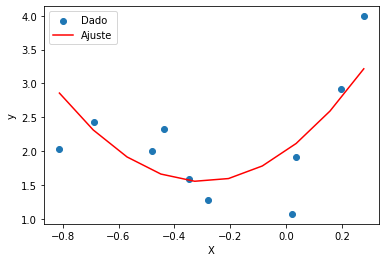

In [131]:
y_fit = X_b_new.dot(coef.T)
plt.scatter(X, ynoise, marker='o',label='Dado')
plt.plot(Xnew, y_fit,'-r',label='Ajuste')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [164]:
#Resolução regressão linear por quadrados mínimos

def normal_eq(X,y,grau):
    #Matriz phi
    X_b = []
    for i in range(0,grau+1):
        X_b.append(X**i)
    X_b = np.array(X_b).T
    # Calcula equação normal
    coef = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    # melhor ajuste para theta
    y_fit = X_b.dot(coef.T)
    
    return y_fit, coef

def plot_ajuste(X,y,coef):
    Xnew = np.linspace(np.min(X),np.max(X),N)
    X_b_new = []
    for i in range(0,len(coef+1)):
        X_b_new.append(Xnew**i)
    X_b_new = np.array(X_b_new).T
    y_fit_new = X_b_new.dot(coef.T)
    plt.scatter(X, y, marker='o',label='Dado')
    plt.plot(Xnew, y_fit_new,'-r',label='Ajuste')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    

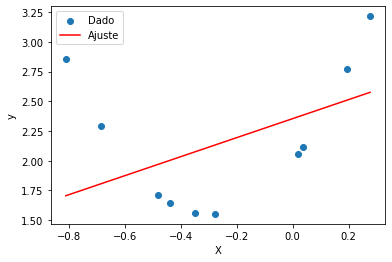

In [165]:
y_fit_1, coef = normal_eq(X,ynoise,1)
plot_ajuste(X,y,coef)

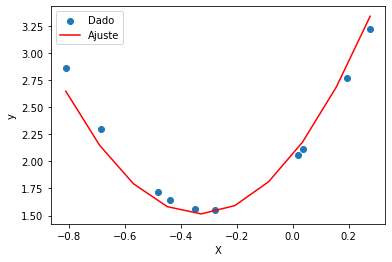

In [166]:
y_fit_2, coef = normal_eq(X,ynoise,2)
plot_ajuste(X,y,coef)

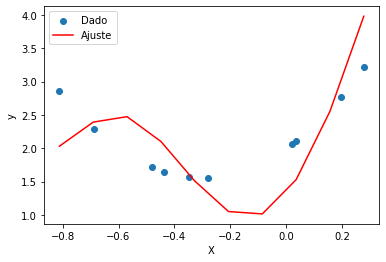

In [167]:
#E se tentarmos ajustar por polinômios de outros graus?

y_fit_6, coef = normal_eq(X,ynoise,6)
plot_ajuste(X,y,coef)

$MRE = \frac{1}{N}\sum_{i=1}^{N} ( y_{fit}(i) - y(i))^2$


$MRA = \frac{1}{N}\sum_{i=1}^{N} \| y_{fit}(i) - y(i))\|$

In [168]:
def metrics_reg(y,yfit):
    N = len(y)
    MRE = 1/N*np.sum((y-yfit)**2)
    MRA = 1/N*np.sum(np.abs(y-yfit))
    return MRE, MRA
    

In [169]:
MRE1,MRA1 = metrics_reg(ynoise,y_fit_1)
MRE2,MRA2 = metrics_reg(ynoise,y_fit_2)
MRE6,MRA6 = metrics_reg(ynoise,y_fit_6)


print('Grau 1: MRE = ',MRE1,", MRA = ",MRA1)
print('Grau 2: MRE = ',MRE2,", MRA = ",MRA2)
print('Grau 6: MRE = ',MRE6,", MRA = ",MRA6)

Grau 1: MRE =  0.5642945787614941 , MRA =  0.622057665278946
Grau 2: MRE =  0.285233211224667 , MRA =  0.4380144502307328
Grau 6: MRE =  0.04123916599744664 , MRA =  0.1395897831235127


Text(0, 0.5, 'Erro')

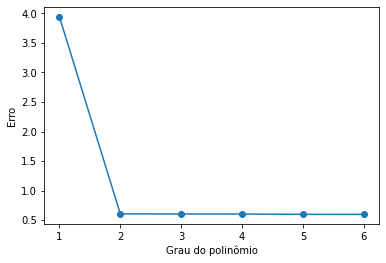

In [192]:
errors = []
for i in range(1,7):
    y_fit, coef = normal_eq(X,ynoise,i)
    MRE, MRA = metrics_reg(ynoise, y_fit)
    errors.append(MRE)

plt.plot(range(1,7),errors,'-o')
plt.xlabel('Grau do polinômio')
plt.ylabel('Erro')

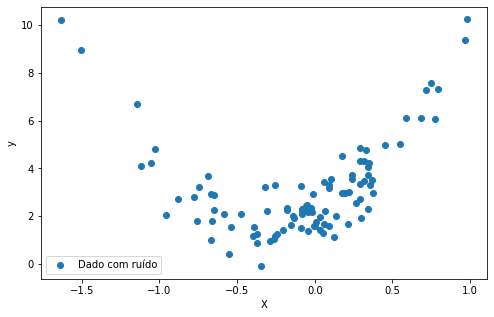

In [176]:
# Vamos voltar ao nosso exemplo com mais dados

N=100 #Número de amostras
# Cria um problema de regressão
mu, sigma = 0, 0.5 # mean and standard deviation
X = np.random.normal(mu, sigma, N)
noise = np.random.normal(mu,0.8 , N)

a=5
b=3
c=2
y = a*X**2 + b*X + c
ynoise = y+noise

plt.subplots(figsize=(8, 5))

plt.scatter(X, ynoise, marker='o',label='Dado com ruído')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


Para avaliar o modelo, seria interessante avaliar em uma porção do dado que não foi utilizada para o ajuste 

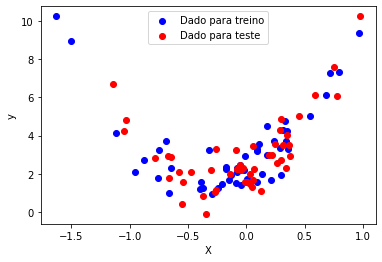

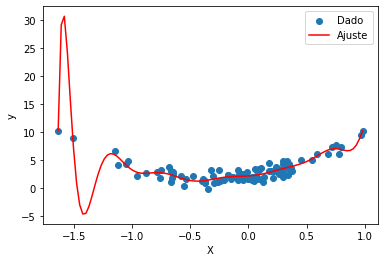

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, ynoise, 
                                                    test_size=0.50,
                                                    random_state=2)

plt.scatter(X_train, y_train, marker='o', color="blue",label='Dado para treino')
plt.scatter(X_test, y_test, marker='o', color="red",label='Dado para teste')

plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc='upper center')
plt.show()

y_fit_6, coef = normal_eq(X,ynoise,15)
plot_ajuste(X,ynoise,coef)

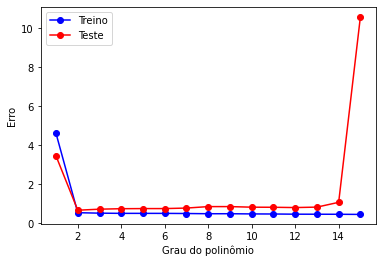

In [222]:
errors_test = []
errors_train = []

graumax=16
for i in range(1,graumax):
    # Vamos encontrar os coefs com os dados de treino
    y_train_fit, coef = normal_eq(X_train,y_train,i)
    # Vamos avaliar o modelo nos dados de treino
    MRE_train, MRA_train = metrics_reg(y_train, y_train_fit)
    errors_train.append(MRE_train)

    # E vamos avaliar o modelo também nos dados de teste,
    # usando as previsões com os coeficientes encontrados nos dados
    #de treino
    X_b=[]
    for i in range(0,i+1):
        X_b.append(X_test**i)
    X_b = np.array(X_b).T
    y_test_fit = X_b.dot(coef)
    MRE_test, MRA_test = metrics_reg(y_test, y_test_fit)
    errors_test.append(MRE_test)

plt.plot(range(1,graumax),errors_train,'-ob',label='Treino')
plt.plot(range(1,graumax),errors_test,'-or',label='Teste')
plt.xlabel('Grau do polinômio')
plt.ylabel('Erro')
plt.legend()